In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("./data/1-updated_OLINK_data.csv")
df.shape

(41449, 2920)

In [5]:
df.head()

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
0,1000221,-0.5340,0.1171,-0.3951,-0.5200,-0.18180,-0.0230,-0.7809,-1.2809,0.0640,...,-0.30305,-0.38945,-0.25995,-0.4113,0.00000,-0.3632,1.8161,0.28635,NaN,NaN
1,1000326,2.3203,1.9646,NaN,NaN,-0.12080,-0.3933,-0.1192,1.5434,-0.0643,...,0.03015,1.55925,-0.56845,1.6588,1.94960,NaN,1.6599,-0.02835,-0.59020,NaN
2,1000662,0.0833,0.7406,-0.1224,-0.0655,0.14990,0.1793,0.4507,-0.4145,0.1071,...,0.23710,0.62860,-0.35165,0.2819,0.57525,0.2082,-1.4408,-0.07190,-0.06130,0.3514
3,1000823,0.6995,0.5135,-0.2698,0.2000,0.26940,0.7334,-0.1698,0.0148,0.2021,...,-0.02510,0.63700,-0.13355,0.3909,0.39785,-0.2310,1.1075,0.06480,-0.26970,0.4782
4,1000945,-0.1842,-2.1843,-0.5860,-0.2403,-0.13715,-0.5533,NaN,NaN,-0.2273,...,-0.40400,-1.18330,-0.29615,-2.0295,-1.42410,-0.6222,0.8497,-0.31770,3.32895,0.1135


In [6]:
df=df.set_index('Id')
df.index.names = ['Id']

df_raw = df.copy()
df.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
1000221,-0.5340,0.1171,-0.3951,-0.5200,-0.18180,-0.0230,-0.7809,-1.2809,0.0640,0.21390,...,-0.30305,-0.38945,-0.25995,-0.4113,0.00000,-0.3632,1.8161,0.28635,NaN,NaN
1000326,2.3203,1.9646,NaN,NaN,-0.12080,-0.3933,-0.1192,1.5434,-0.0643,2.21500,...,0.03015,1.55925,-0.56845,1.6588,1.94960,NaN,1.6599,-0.02835,-0.59020,NaN
1000662,0.0833,0.7406,-0.1224,-0.0655,0.14990,0.1793,0.4507,-0.4145,0.1071,0.57655,...,0.23710,0.62860,-0.35165,0.2819,0.57525,0.2082,-1.4408,-0.07190,-0.06130,0.3514
1000823,0.6995,0.5135,-0.2698,0.2000,0.26940,0.7334,-0.1698,0.0148,0.2021,1.21695,...,-0.02510,0.63700,-0.13355,0.3909,0.39785,-0.2310,1.1075,0.06480,-0.26970,0.4782
1000945,-0.1842,-2.1843,-0.5860,-0.2403,-0.13715,-0.5533,NaN,NaN,-0.2273,-0.34310,...,-0.40400,-1.18330,-0.29615,-2.0295,-1.42410,-0.6222,0.8497,-0.31770,3.32895,0.1135


In [7]:
nan_counts = df.isna().sum()
nan_counts

EIF4EBP1     527
EIF4G1       164
EIF5A        996
ENAH         996
ENG          144
            ... 
CHGB         321
CHGA         222
CHRM1       1083
KLK1         843
WFDC2       2223
Length: 2919, dtype: int64

In [9]:
sorted_nan_counts = nan_counts.sort_values(ascending=False)
sorted_nan_counts

CST1       5383
TACSTD2    4994
AMY2B      3915
CTSD       3533
ENDOU      3256
           ... 
SELE        144
NOTCH3      144
MFAP5       144
PDGFA       144
REG3A       144
Length: 2919, dtype: int64

## Reverse value from log2(x)

In [10]:
df_reverse = np.power(2, df)

In [11]:
df_reverse.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
1000221,0.690637,1.084553,0.760437,0.697372,0.881602,0.984184,0.582004,0.411539,1.045360,1.159819,...,0.810537,0.763421,0.835117,0.751945,1.000000,0.777438,3.521280,1.219551,NaN,NaN
1000326,4.994361,3.903045,NaN,NaN,0.919678,0.761386,0.920698,2.914806,0.956409,4.642816,...,1.021118,2.947006,0.674341,3.157538,3.862674,NaN,3.159946,0.980541,0.664251,NaN
1000662,1.059439,1.670871,0.918658,0.955614,1.109493,1.132334,1.366703,0.750279,1.077061,1.491279,...,1.178621,1.546064,0.783687,1.215795,1.489936,1.155246,0.368363,0.951384,0.958400,1.275798
1000823,1.623942,1.427509,0.829435,1.148698,1.205306,1.662553,0.888966,1.010311,1.150372,2.324548,...,0.982752,1.555092,0.911586,1.311211,1.317543,0.852044,2.154719,1.045940,0.829492,1.393005
1000945,0.880137,0.220019,0.666187,0.846569,0.909314,0.681460,NaN,NaN,0.854232,0.788346,...,0.755760,0.440343,0.814423,0.244940,0.372652,0.649679,1.802126,0.802348,10.048791,1.081850


In [12]:
range_per_column = df_reverse.max() - df_reverse.min()
range_per_column

EIF4EBP1    59.772582
EIF4G1      10.884557
EIF5A       71.883148
ENAH        28.101570
ENG          4.240634
              ...    
CHGB        11.443413
CHGA        57.064742
CHRM1       48.121113
KLK1        40.809016
WFDC2       14.515509
Length: 2919, dtype: float64

In [13]:
min_range = range_per_column.min()
max_range = range_per_column.max()

print(min_range, max_range)
print(range_per_column.idxmin(), range_per_column.idxmax())

1.8490853184882392 11140.041645483387
MET DLL4


In [14]:
df_reverse.to_csv("./data/2-updated_OLINK_data_reverse.csv")

## Apply Log2(x+1)

In [15]:
df_log1p = np.log2(df_reverse + 1)
df_log1p.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
1000221,0.757567,1.059738,0.815933,0.763303,0.911962,0.988546,0.661753,0.497269,1.032355,1.110911,...,0.856418,0.818377,0.875872,0.808958,1.000000,0.829799,2.176731,1.150268,NaN,NaN
1000326,2.583606,2.293678,NaN,NaN,0.940864,0.816711,0.941631,1.968941,0.968208,2.496415,...,1.015154,1.980759,0.743593,2.055729,2.281750,NaN,2.056565,0.985895,0.734873,NaN
1000662,1.042251,1.417310,0.940098,0.967622,1.076896,1.092434,1.242879,0.807585,1.054544,1.316886,...,1.123415,1.348269,0.834863,1.147824,1.316108,1.107852,0.452451,0.964498,0.969676,1.186373
1000823,1.391736,1.279477,0.871398,1.103463,1.140979,1.412810,0.917597,1.007419,1.104586,1.733158,...,0.987505,1.353375,0.934770,1.208649,1.212596,0.889118,1.657512,1.032764,0.871443,1.258823
1000945,0.910838,0.286904,0.736551,0.884847,0.933054,0.749714,NaN,NaN,0.890822,0.838626,...,0.812096,0.526413,0.859511,0.316076,0.456966,0.722186,1.486522,0.849878,3.465817,1.057866


In [16]:
range_per_column = df_log1p.max() - df_log1p.min()
range_per_column

EIF4EBP1    5.834933
EIF4G1      3.527966
EIF5A       5.734887
ENAH        4.691632
ENG         1.961699
              ...   
CHGB        3.352746
CHGA        5.662411
CHRM1       5.159468
KLK1        5.324020
WFDC2       3.589534
Length: 2919, dtype: float64

In [17]:
min_range = range_per_column.min()
max_range = range_per_column.max()

print(min_range, max_range)
print(range_per_column.idxmin(), range_per_column.idxmax())

1.1448833718706155 13.267148269673708
PODXL GH2


In [18]:
df_log1p.to_csv("./data/2-updated_OLINK_data_log1p.csv")

## Process outlier value

In [19]:
df_replaced = df_log1p

for col in df_log1p.columns: 
    mean = df_log1p[col].mean()
    std = df_log1p[col].std()
    df_replaced[col] = np.where(np.abs(df_log1p[col] - mean) > 3 * std, mean, df_log1p[col])

In [20]:
df_replaced.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
1000221,0.757567,1.059738,0.815933,0.763303,0.911962,0.988546,0.661753,0.497269,1.032355,1.110911,...,0.856418,0.818377,0.875872,0.808958,1.000000,0.829799,2.176731,1.150268,NaN,NaN
1000326,1.062782,2.293678,NaN,NaN,0.940864,0.816711,0.941631,1.968941,0.968208,1.055246,...,1.015154,1.980759,0.743593,1.033172,2.281750,NaN,2.056565,0.985895,0.734873,NaN
1000662,1.042251,1.417310,0.940098,0.967622,1.076896,1.092434,1.242879,0.807585,1.054544,1.316886,...,1.123415,1.348269,0.834863,1.147824,1.316108,1.107852,0.452451,0.964498,0.969676,1.186373
1000823,1.391736,1.279477,0.871398,1.103463,1.140979,1.412810,0.917597,1.007419,1.104586,1.733158,...,0.987505,1.353375,0.934770,1.208649,1.212596,0.889118,1.657512,1.032764,0.871443,1.258823
1000945,0.910838,0.286904,0.736551,0.884847,0.933054,0.749714,NaN,NaN,0.890822,0.838626,...,0.812096,0.526413,0.859511,0.316076,0.456966,0.722186,1.486522,0.849878,3.465817,1.057866


In [21]:
range_per_column = df_replaced.max() - df_replaced.min()
range_per_column

EIF4EBP1    2.159195
EIF4G1      2.644716
EIF5A       1.067366
ENAH        1.631982
ENG         0.583911
              ...   
CHGB        1.416123
CHGA        2.712124
CHRM1       1.218051
KLK1        4.088471
WFDC2       1.465036
Length: 2919, dtype: float64

In [22]:
# 获取数据范围的最小值和最大值
min_range = range_per_column.min()
max_range = range_per_column.max()

print(min_range, max_range)
print(range_per_column.idxmin(), range_per_column.idxmax())

0.24933277794512598 8.172464597759742
SERPINA1 SPINT3


In [23]:
# 计算每一列中 NaN 值的数量
nan_counts = df_replaced.isna().sum()
print(nan_counts)

EIF4EBP1     527
EIF4G1       164
EIF5A        996
ENAH         996
ENG          144
            ... 
CHGB         321
CHGA         222
CHRM1       1083
KLK1         843
WFDC2       2223
Length: 2919, dtype: int64


In [24]:
sorted_nan_counts = nan_counts.sort_values(ascending=False)
sorted_nan_counts[:10]

CST1                 5383
TACSTD2              4994
AMY2B                3915
CTSD                 3533
ENDOU                3256
AMY1A_AMY1B_AMY1C    2861
CFH                  2679
AMY2A                2583
BPIFA2               2562
OLFM4                2552
dtype: int64

In [25]:
df_replaced.to_csv("./data/2-updated_OLINK_data_log1p_no_outlier.csv")

## Process nan value

In [25]:
# df_replaced_copy = df_replaced.copy()
df_replaced_copy = pd.read_csv("./data/2-updated_OLINK_data_log1p_no_outlier.csv")
df_replaced_copy=df_replaced_copy.set_index('Id')
df_replaced_copy.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
1000221,0.757567,1.059738,0.815933,0.763303,0.911962,0.988546,0.661753,0.497269,1.032355,1.110911,...,0.856418,0.818377,0.875872,0.808958,1.000000,0.829799,2.176731,1.150268,NaN,NaN
1000326,1.062782,2.293678,NaN,NaN,0.940864,0.816711,0.941631,1.968941,0.968208,1.055246,...,1.015154,1.980759,0.743593,1.033172,2.281750,NaN,2.056565,0.985895,0.734873,NaN
1000662,1.042251,1.417310,0.940098,0.967622,1.076896,1.092434,1.242879,0.807585,1.054544,1.316886,...,1.123415,1.348269,0.834863,1.147824,1.316108,1.107852,0.452451,0.964498,0.969676,1.186373
1000823,1.391736,1.279477,0.871398,1.103463,1.140979,1.412810,0.917597,1.007419,1.104586,1.733158,...,0.987505,1.353375,0.934770,1.208649,1.212596,0.889118,1.657512,1.032764,0.871443,1.258823
1000945,0.910838,0.286904,0.736551,0.884847,0.933054,0.749714,NaN,NaN,0.890822,0.838626,...,0.812096,0.526413,0.859511,0.316076,0.456966,0.722186,1.486522,0.849878,3.465817,1.057866


In [26]:
df_replaced_copy.fillna(0, inplace=True)

In [27]:
df_replaced_copy.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
1000221,0.757567,1.059738,0.815933,0.763303,0.911962,0.988546,0.661753,0.497269,1.032355,1.110911,...,0.856418,0.818377,0.875872,0.808958,1.000000,0.829799,2.176731,1.150268,0.000000,0.000000
1000326,1.062782,2.293678,0.000000,0.000000,0.940864,0.816711,0.941631,1.968941,0.968208,1.055246,...,1.015154,1.980759,0.743593,1.033172,2.281750,0.000000,2.056565,0.985895,0.734873,0.000000
1000662,1.042251,1.417310,0.940098,0.967622,1.076896,1.092434,1.242879,0.807585,1.054544,1.316886,...,1.123415,1.348269,0.834863,1.147824,1.316108,1.107852,0.452451,0.964498,0.969676,1.186373
1000823,1.391736,1.279477,0.871398,1.103463,1.140979,1.412810,0.917597,1.007419,1.104586,1.733158,...,0.987505,1.353375,0.934770,1.208649,1.212596,0.889118,1.657512,1.032764,0.871443,1.258823
1000945,0.910838,0.286904,0.736551,0.884847,0.933054,0.749714,0.000000,0.000000,0.890822,0.838626,...,0.812096,0.526413,0.859511,0.316076,0.456966,0.722186,1.486522,0.849878,3.465817,1.057866


In [28]:
df_replaced_copy.to_csv("./data/2-updated_OLINK_data_nanToZero.csv")

In [44]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.impute import SimpleImputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor

In [46]:
# import time

# # 假设 df_replaced_copy 是原始数据集
# df_replaced_copy_subset = df_replaced_copy.iloc[:1000, :2000]

# # 创建 IterativeImputer 实例
# imputer = IterativeImputer(
#     max_iter=10,
#     tol=1e-3,
#     n_nearest_features=10,
#     initial_strategy='mean',
#     imputation_order='ascending',
#     min_value=0,
#     max_value=8.172,
#     random_state=42,
#     verbose=2
# )

# # 测试子集上的运行时间
# start_time = time.time()
# imputed_data_subset = imputer.fit_transform(df_replaced_copy_subset)
# end_time = time.time()

# print(f"子集运行时间: {end_time - start_time} 秒")

In [ ]:
# import time

# imputer = IterativeImputer(
#     estimator=RandomForestRegressor(),
#     max_iter=10,
#     tol=0.0001,
#     n_nearest_features=10,
#     initial_strategy='mean',
#     imputation_order='ascending',
#     min_value=0,
#     max_value=8.172,
#     random_state=42,
#     verbose=2
# )

# start_time = time.time()
# imputed_data = imputer.fit_transform(df_replaced_copy)
# end_time = time.time()
# print(f"运行时间: {end_time - start_time} 秒")

# # imputed_data.to_csv("./data/2-updated_OLINK_data_imputed.csv")

[IterativeImputer] Completing matrix with shape (41449, 2919)


In [ ]:
# imputed_df = pd.DataFrame(imputed_data, columns=df_replaced_copy.columns,index = df_replaced_copy.index)

In [ ]:
# imputed_df.head()

In [ ]:
# imputed_df.index = df_replaced_copy.index
# imputed_df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# imputed_df.to_csv("./data/2-updated_OLINK_data_imputed_v2.csv")

In [40]:
# nan_counts = imputed_df.isna().sum()
# sorted_nan_counts = nan_counts.sort_values(ascending=False)
# sorted_nan_counts

EIF4EBP1    0
LRRC37A2    0
LRP2BP      0
LRPAP1      0
LRRC25      0
           ..
TJP3        0
TIMM8A      0
TIMM10      0
TIGIT       0
WFDC2       0
Length: 2919, dtype: int64

In [18]:
# imputed_df = pd.read_csv("./data/2-updated_OLINK_data_imputed.csv")
# imputed_df.index = df_replaced_copy.index
# imputed_df.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
# imputed_df.head()

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
1000221,0.757567,1.059738,0.815933,0.763303,0.911962,0.988546,0.661753,0.497269,1.032355,1.110911,...,0.856418,0.818377,0.875872,0.808958,1.000000,0.829799,2.176731,1.150268,0.955856,1.000117
1000326,1.062782,2.293678,1.009992,1.203586,0.940864,0.816711,0.941631,1.968941,0.968208,1.055246,...,1.015154,1.980759,0.743593,1.033172,2.281750,1.046646,2.056565,0.985895,0.734873,0.968241
1000662,1.042251,1.417310,0.940098,0.967622,1.076896,1.092434,1.242879,0.807585,1.054544,1.316886,...,1.123415,1.348269,0.834863,1.147824,1.316108,1.107852,0.452451,0.964498,0.969676,1.186373
1000823,1.391736,1.279477,0.871398,1.103463,1.140979,1.412810,0.917597,1.007419,1.104586,1.733158,...,0.987505,1.353375,0.934770,1.208649,1.212596,0.889118,1.657512,1.032764,0.871443,1.258823
1000945,0.910838,0.286904,0.736551,0.884847,0.933054,0.749714,1.050786,0.803872,0.890822,0.838626,...,0.812096,0.526413,0.859511,0.316076,0.456966,0.722186,1.486522,0.849878,3.465817,1.057866


In [20]:
# imputed_df.shape

(41449, 2919)

In [22]:
# imputed_df.to_csv("./data/2-updated_OLINK_data_imputed.csv")

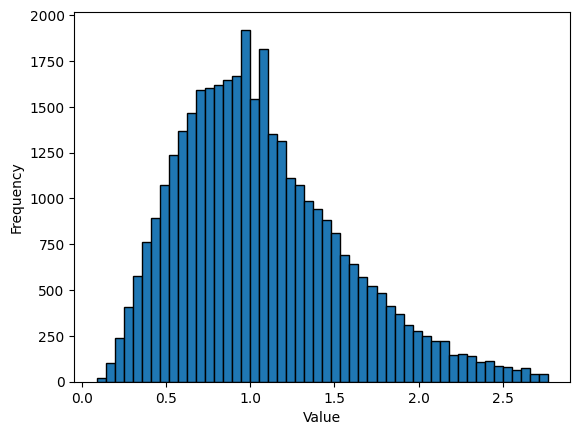

In [7]:
# import matplotlib.pyplot as plt

# # 绘制直方图
# plt.hist(df_replaced['CST1'], bins=50, edgecolor='k')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()

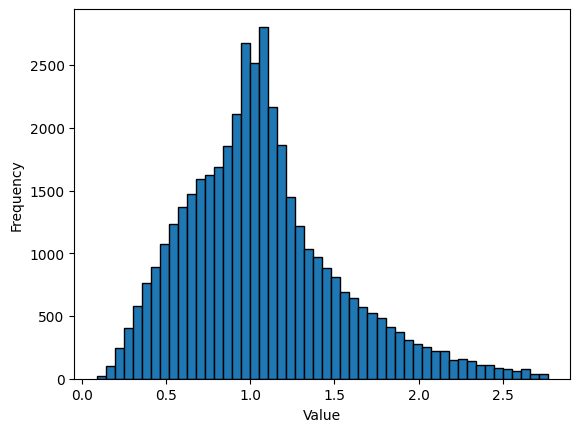

In [8]:
import matplotlib.pyplot as plt

# 绘制直方图
plt.hist(imputed_df['CST1'], bins=50, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### 数据转换(ignore)

In [101]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# data_to_scale = df_replaced

# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(data_to_scale)
# df_scaled = pd.DataFrame(scaled_data, columns=data_to_scale.columns, index=data_to_scale.index)

# df_scaled.head()

### test

In [30]:
df_test = pd.read_csv("./data/2-updated_OLINK_data_nanToZero.csv")
df_test.head()

,Id,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
0,1000221,0.757567,1.059738,0.815933,0.763303,0.911962,0.988546,0.661753,0.497269,1.032355,...,0.856418,0.818377,0.875872,0.808958,1.000000,0.829799,2.176731,1.150268,0.000000,0.000000
1,1000326,1.062782,2.293678,0.000000,0.000000,0.940864,0.816711,0.941631,1.968941,0.968208,...,1.015154,1.980759,0.743593,1.033172,2.281750,0.000000,2.056565,0.985895,0.734873,0.000000
2,1000662,1.042251,1.417310,0.940098,0.967622,1.076896,1.092434,1.242879,0.807585,1.054544,...,1.123415,1.348269,0.834863,1.147824,1.316108,1.107852,0.452451,0.964498,0.969676,1.186373
3,1000823,1.391736,1.279477,0.871398,1.103463,1.140979,1.412810,0.917597,1.007419,1.104586,...,0.987505,1.353375,0.934770,1.208649,1.212596,0.889118,1.657512,1.032764,0.871443,1.258823
4,1000945,0.910838,0.286904,0.736551,0.884847,0.933054,0.749714,0.000000,0.000000,0.890822,...,0.812096,0.526413,0.859511,0.316076,0.456966,0.722186,1.486522,0.849878,3.465817,1.057866


In [31]:
df_test.shape

(41449, 2920)